In [1]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
import matplotlib.pyplot as plt


In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('Training data shape:', x_train.shape)
print('Test data shape:', x_test.shape)

Training data shape: (25000, 500)
Test data shape: (25000, 500)


In [5]:
model = Sequential()
model.add(Embedding(max_features, 32, input_length=maxlen))
model.add(Conv1D(32, 7, activation='relu')) # 1D Convolutional layer
model.add(MaxPooling1D(5)) # Max pooling
model.add(Conv1D(32, 7, activation='relu')) # Another convolutional layer
model.add(GlobalMaxPooling1D()) # Global pooling to reduce dimensions
model.add(Dense(1, activation='sigmoid')) # Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [7]:
history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.6410 - loss: 0.5920 - val_accuracy: 0.8634 - val_loss: 0.3255
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.8854 - loss: 0.2779 - val_accuracy: 0.8788 - val_loss: 0.2919
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9202 - loss: 0.2091 - val_accuracy: 0.8840 - val_loss: 0.2893
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9391 - loss: 0.1680 - val_accuracy: 0.8806 - val_loss: 0.3154
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9537 - loss: 0.1337 - val_accuracy: 0.8874 - val_loss: 0.3100
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9699 - loss: 0.0917 - val_accuracy: 0.8730 - val_loss: 0.3773
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9799 - loss: 0.0643 - val_accuracy: 0.8718 - val_loss: 0.4371
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9912 - loss: 0.0341 - val_accura

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8583 - loss: 0.6317
Test accuracy: 0.8598399758338928


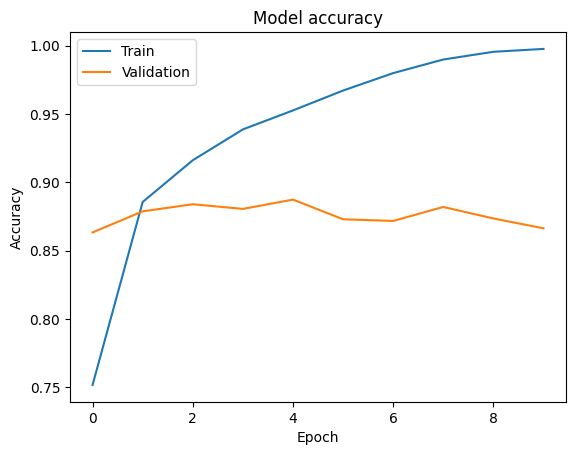

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
